<a href="https://colab.research.google.com/github/RubenCrack/MasterIA_ML/blob/main/ML_Exercises_Group_District12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

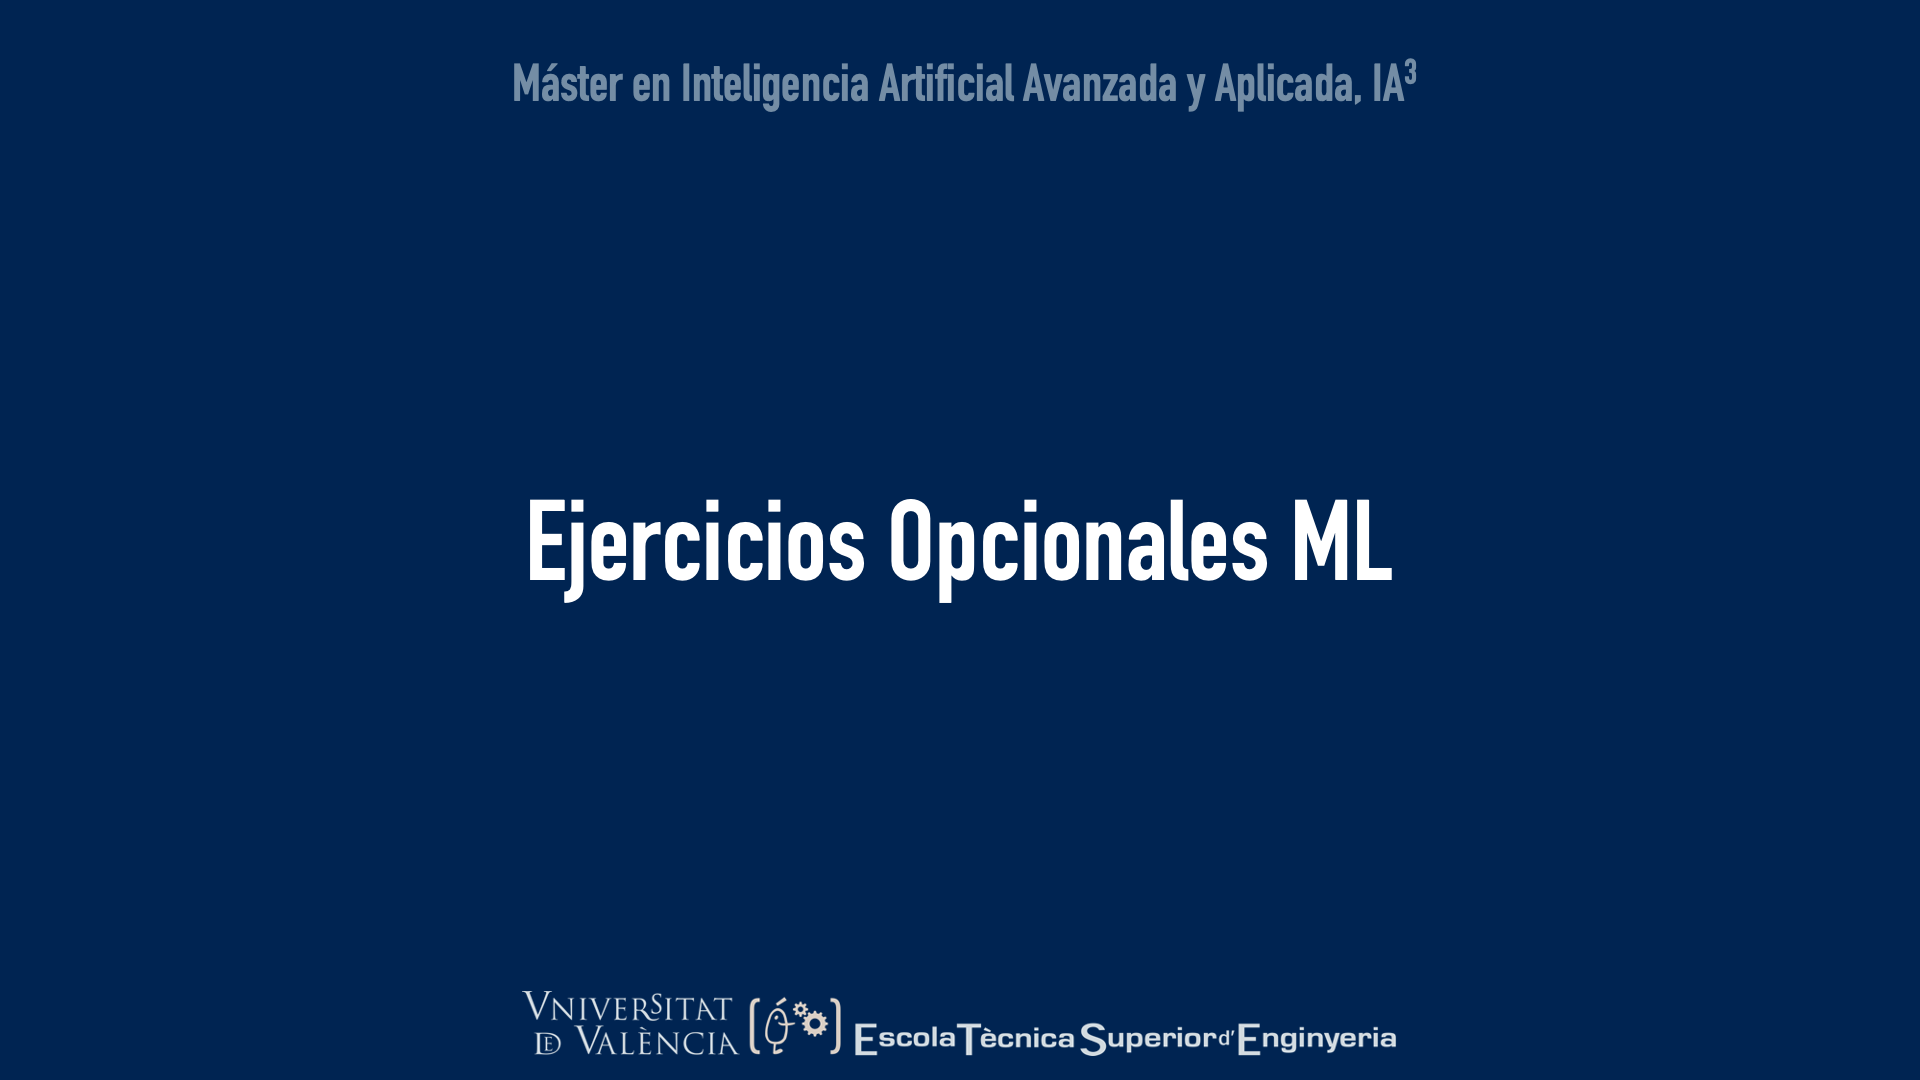

<H1><font color='blue'><u>Group: DISTRICT 12</u></font>

<table>
    <td>
        <tr>__________________________________________________________________________________________________________________________________________________________</tr>
    </td>
</table>

####Members:
+ **Polina Demidova**
+ **Rubén García Zegarra**


<table>
    <td>
        <tr>__________________________________________________________________________________________________________________________________________________________</tr>
    </td>
</table>

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

##Diagram

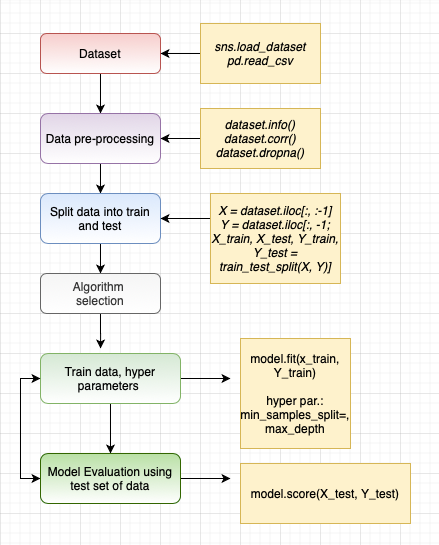

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

<table>
    <td>
        <tr>__________________________________________________________________________________________________________________________________________________________</tr>
    </td>
</table>

##Load data and pre-procesing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
#Initialize the seed
np.random.seed(123)

In [ ]:
#Data preprocessing
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)

#Show the data
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
#Creating train and data sets
X = pd.get_dummies(dataset.iloc[:,:-1])
Y = dataset['sex']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (249, 10)
Shape of X_test=> (84, 10)
Shape of Y_train=> (249,)
Shape of Y_test=> (84,)


In [ ]:
#Verify the correlation
dataset.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


##Random Forest Classifier

In [ ]:
#Building Random Forest Classifier 
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)

print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train, average="binary", pos_label='Female'))

Training Set Evaluation F1-Score=> 1.0


In [ ]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)

print('Test Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test, average="binary", pos_label='Female'))

Test Set Evaluation F1-Score=> 0.9577464788732395


In [ ]:
# Evaluating Score on Train set
print("R-squared score on train set: ",rfc.score(X_train, Y_train))

R-squared score on train set:  1.0


In [ ]:
# Evaluating Score on Test set
print("R-squared score on test  set: ",rfc.score(X_test, Y_test))

R-squared score on test  set:  0.9642857142857143


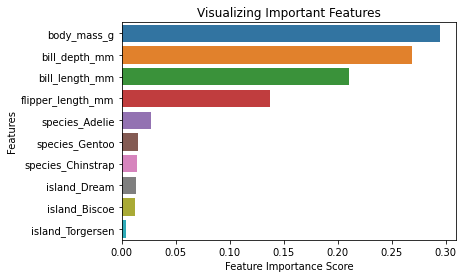

In [ ]:
#Creating a bar plot
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

##Decission Tree

In [ ]:
#While Decision Tree Classifier will work as follows:

# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42,max_depth=10,min_samples_split=28)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=28,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Evaluation on Training set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train, average="binary", pos_label='Female'))


Training Set Evaluation F1-Score=> 0.9027237354085603


In [ ]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test, average="binary", pos_label='Female'))

Testing Set Evaluation F1-Score=> 0.8285714285714286


In [ ]:
# Evaluating Score on Train set
dt.score(X_train, Y_train)

0.8995983935742972

In [ ]:
# Evaluating Score on Test set
dt.score(X_test, Y_test)

0.8571428571428571

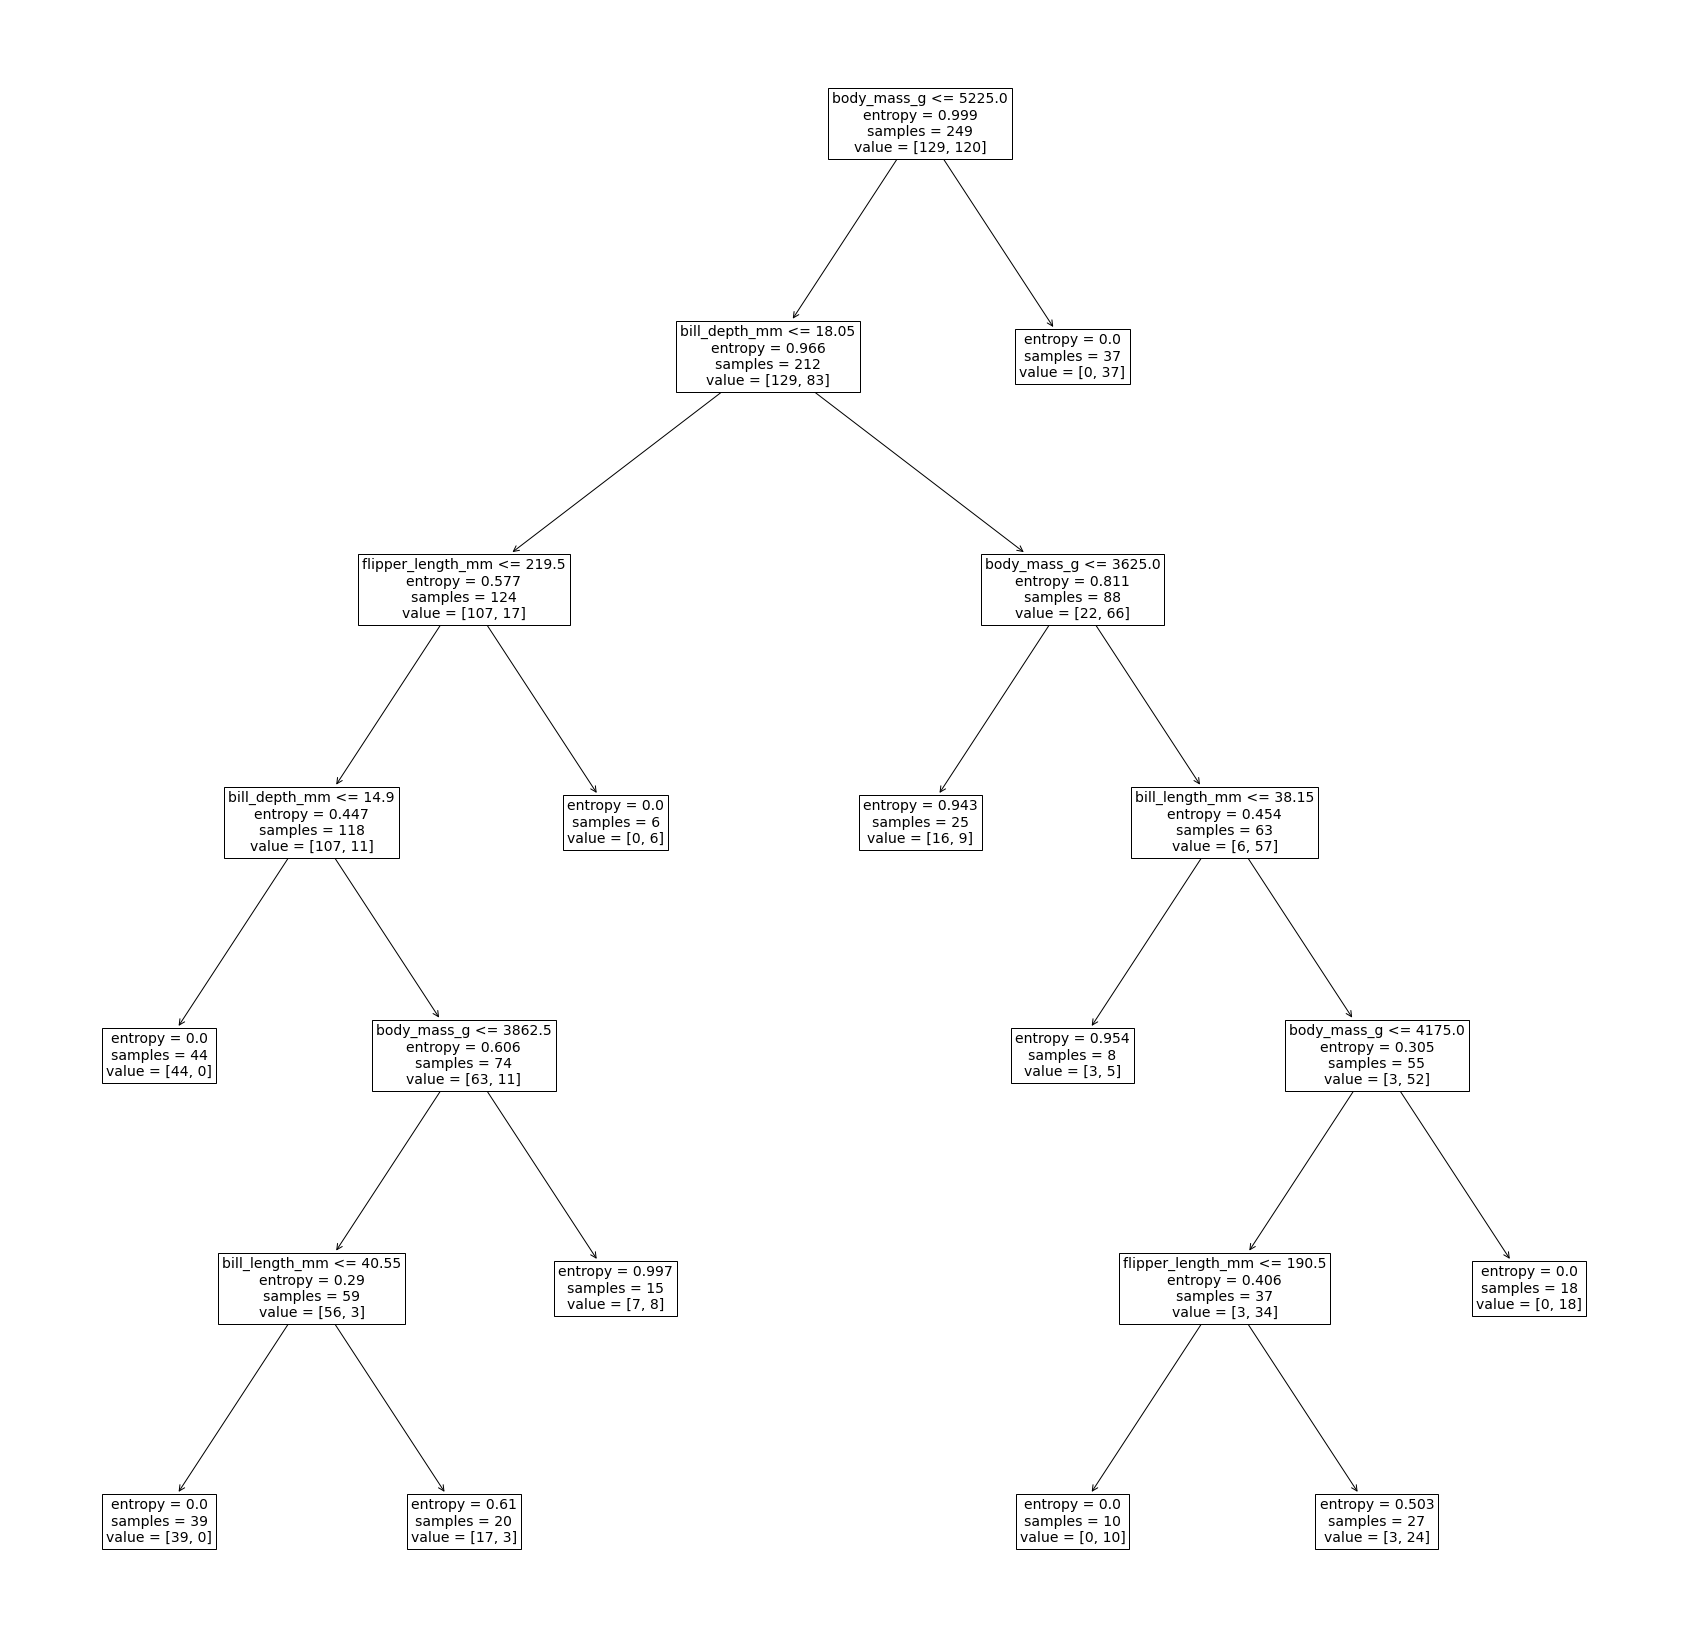

In [ ]:
# Graphing tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(dt, feature_names=X.columns, fontsize=14)
plt.show()

##Naive Bayes

In [ ]:
###Using Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
%(X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 84 points : 18


In [ ]:
#Accuracy evaluation
print("Accuracy on train set: ",gnb.score(X_train,Y_train))
print("Accuracy on test  set: ",gnb.score(X_test,Y_test))

Accuracy on train set:  0.7108433734939759
Accuracy on test  set:  0.7857142857142857


##KNN (K Nearest Neighbor):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Calculate the accuracy of KNN for different Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat1=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat1)

mean_acc

array([0.72619048, 0.69047619, 0.70238095, 0.72619048, 0.77380952,
       0.75      , 0.75      , 0.73809524, 0.72619048])

In [ ]:
#Call Clasificador, training Model and Predict para K=6 (position high value of last array(0.77380952))
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

In [ ]:
#Predicting con test set:
yhat_knn = neigh.predict(X_test)

In [ ]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat_knn))

Train set Accuracy:  0.8273092369477911
Test set Accuracy:  0.7738095238095238


####As a result we see that the models have mostly better performance and there is no overfitting.